In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
import numpy as np
import matplotlib.pyplot as plt
import dragoman as dm
from dragoman.utils.stats import weighted_quantile
from scipy import optimize as opt

In [2]:
plt.rcParams['figure.figsize'] = [12., 8.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

In [3]:
def rosen(x, y):
    '''Rosenbrock function'''
    out = np.empty_like(x)
    for i in range(x.shape[0]):
        out[i] = opt.rosen([x[i], y[i]])
    return out

In [26]:
def gd(f, g, x0, alpha=0.001):
    '''Naive gradient descent'''
    x = [x0]
    for i in range(1000):
        grad = g(x[-1])
        x.append(x[-1] - alpha*grad)
    return x

In [27]:
def newton(f, g, h, x0):
    '''Newtown method'''
    x = [x0]
    for i in range(5):
        grad = g(x[-1])
        hess = h(x[-1])
        inv_hess = np.linalg.inv(hess)
        x.append(x[-1] - np.dot(inv_hess, grad))
    return x

In [4]:
g = dm.GridData(x = np.linspace(-1.5,2,300), y = np.linspace(-2,3,300))

In [5]:
g['f'] = rosen(g.get_array('x', flat=True), g.get_array('y', flat=True)).reshape(g.shape)

In [46]:
#method = 'nelder-mead'
method = 'CG'

points = []
def callback(xk, *args, **kwargs):
    points.append(xk)

res = opt.minimize(opt.rosen, jac=opt.rosen_der, hess=opt.rosen_hess, x0=[-1, -1], method=method, callback=callback)

/home/iwsatlas1/peller/.local/lib/python3.7/site-packages/scipy/optimize/_minimize.py:511: RuntimeWarning: Method CG does not use Hessian information (hess).
  RuntimeWarning)


In [43]:
method='GA'
points = []
def r(x):
    points.append(x)
    return opt.rosen(x)
res = opt.differential_evolution(r, bounds=[[-1.5, 2], [-2,3]]) #, callback=callback)
points = np.array(points)

In [34]:
method = 'Newton, Iterations = 5'
points = newton(opt.rosen, opt.rosen_der, opt.rosen_hess, x0 = np.array([-1, -1]))

In [38]:
method = 'Simple GD, alpha=0.003, Iterations = 1000'
points = gd(opt.rosen, opt.rosen_der, x0 = np.array([-1, -1]), alpha=0.003)

/home/iwsatlas1/peller/.local/lib/python3.7/site-packages/scipy/optimize/optimize.py:236: RuntimeWarning: overflow encountered in double_scalars
  der[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
/home/iwsatlas1/peller/.local/lib/python3.7/site-packages/scipy/optimize/optimize.py:237: RuntimeWarning: overflow encountered in double_scalars
  der[-1] = 200 * (x[-1] - x[-2]**2)
/home/iwsatlas1/peller/.local/lib/python3.7/site-packages/scipy/optimize/optimize.py:236: RuntimeWarning: invalid value encountered in double_scalars
  der[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
/home/iwsatlas1/peller/.local/lib/python3.7/site-packages/scipy/optimize/optimize.py:237: RuntimeWarning: invalid value encountered in double_scalars
  der[-1] = 200 * (x[-1] - x[-2]**2)


Text(0.5, 1.0, 'CG, steps = 18, function calls = 39\n solution = [1. 1.]')

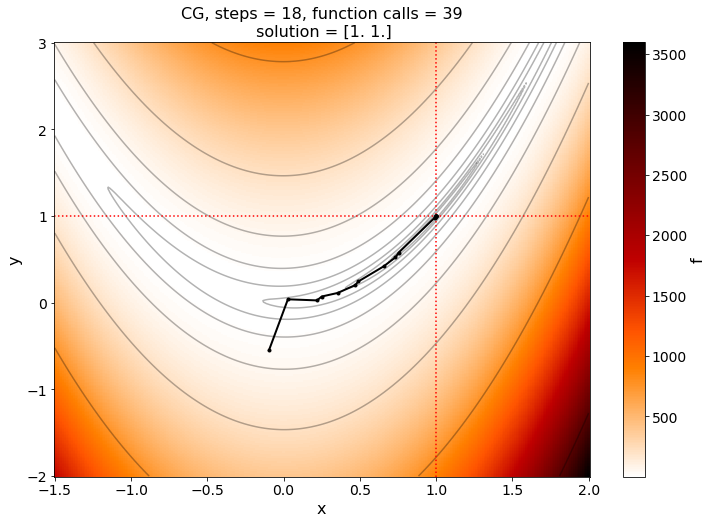

In [48]:
points = np.array(points)

g.plot(cmap='gist_heat_r', cbar=True)
g.plot_contour(colors='k', alpha=0.3, levels=np.logspace(-1,4,10))
plt.gca().axvline(1, c='r', ls=':')
plt.gca().axhline(1, c='r', ls=':')
plt.plot(points[:,0], points[:,1], '.-',  c='k', lw=2)
plt.gca().set_title(f'{method}, steps = {res.nit}, function calls = {res.nfev}\n solution = {res.x}')

#plt.savefig(f'{method}.png', bbox_inches='tight')